In [1]:
# !pip install tensorflow


In [4]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[2]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from collections import Counter
#nlp = spacy.load("en_core_web_sm")
from nltk import word_tokenize
pd.set_option('display.max_colwidth', None)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from vector_functions import vectorize_word2vec, vectorize_glove, vectorize_glove_test_data, vectorize_word2vec_test_data
import nltk

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping



#### Beladung der Daten

In [5]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/train_cleaned_rnn.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/test_cleaned_rnn.csv'))

df_cleaned_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)

df_cleaned.head(1)

,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
id,,,,,,
8886,0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,cinemaaawards final rehearsals gearing up for the evening butterflies stage hope You all like it,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN


### Vektorisierung

#### GloVe 

In [6]:


twitter_glove_path = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/glove.6B.200d.txt'))


X_train_vectors, X_test_vectors, y_train, y_test, glove_embeddings = vectorize_glove(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)

X_test_data_vectors , y_test_data, glove_embeddings = vectorize_glove_test_data(df=df_cleaned_test, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)

X_train_vectors_2 , y_train_2, glove_embeddings = vectorize_glove_test_data(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)

c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)
c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


In [6]:
y_train_2

id
8886     0
909      0
27613    0
15999    0
23817    0
        ..
16407    0
6526     0
8002     1
323      0
16978    0
Name: label, Length: 20178, dtype: int64

In [7]:


samples_2, max_seq_len_2, vector_size_2 = X_train_vectors_2.shape
num_classes_2 = len(np.unique(y_train_2))

y_train_onehot_2 = to_categorical(y_train_2, num_classes=num_classes_2)
y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes_2)

# Modellinitialisierung
model_tr_2 = Sequential()

# LSTM-Schicht
model_tr_2.add(LSTM(units=128, input_shape=(max_seq_len_2, vector_size_2), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_tr_2.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_tr_2.add(Dense(units=num_classes_2, activation='softmax'))

# Kompilieren des Modells
model_tr_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tr_2 = model_tr_2.fit(
    X_train_vectors_2, y_train_onehot_2,
    validation_data=(X_test_data_vectors, y_test_onehot_data),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Klassifikationsbericht erstellen
# Vorhersagen auf Testdaten
predictions_tr_2 = model_tr_2.predict(X_test_data_vectors)
predicted_classes_tr_2 = np.argmax(predictions_tr_2, axis=1)






C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.9282 - loss: 0.2868 - val_accuracy: 0.9330 - val_loss: 0.2458
Epoch 2/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9333 - loss: 0.2528 - val_accuracy: 0.9326 - val_loss: 0.2472
Epoch 3/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9331 - loss: 0.2492 - val_accuracy: 0.9326 - val_loss: 0.2475
Epoch 4/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9340 - loss: 0.2471 - val_accuracy: 0.9326 - val_loss: 0.2456
Epoch 5/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9323 - loss: 0.2481 - val_accuracy: 0.9330 - val_loss: 0.2455
Epoch 6/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9342 - loss: 0.2415 - val_accuracy: 0.9332 - val_loss: 0.2404
Epoch 7/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9374 - loss: 0.2329 - val_accuracy: 0.9326 - val_loss: 0.2050
Epoch 8/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9345 - loss: 0.1803 - 

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8239
     Class 1       0.60      0.62      0.61       595

    accuracy                           0.95      8834
   macro avg       0.79      0.79      0.79      8834
weighted avg       0.95      0.95      0.95      8834

[[8000  239]
 [ 229  366]]


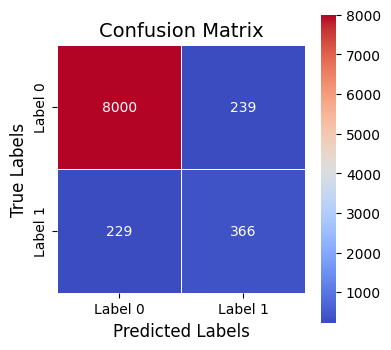

In [8]:
report = classification_report(np.argmax(y_test_onehot_data, axis=1), predicted_classes_tr_2, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(np.argmax(y_test_onehot_data, axis=1), predicted_classes_tr_2)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

### Modell aufbauen 

#### One-Hot-Encoding der Labels

In [9]:

X_train_w2v, X_test_w2v, y_train_wv, y_test_vw, w2v_model = vectorize_word2vec(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")


X_test_w2v_data, y_test_wv_data, w2v_model = vectorize_word2vec_test_data(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")



c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)
c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\vector_functions.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


In [10]:
samples_w2v, max_seq_len_w2v, vector_size_w2v = X_train_w2v.shape
num_classes_w2v = len(np.unique(y_train_wv))

y_train_onehot_w2v = to_categorical(y_train_wv, num_classes=num_classes_w2v)
y_test_onehot_w2v= to_categorical(y_test_vw, num_classes=num_classes_w2v)

y_test_data_onehot_w2v= to_categorical(y_test_wv_data, num_classes=num_classes_w2v)

In [11]:

# Modellinitialisierung
model_w2v = Sequential()

# LSTM-Schicht
model_w2v.add(LSTM(units=128, input_shape=(max_seq_len_w2v, vector_size_w2v), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_w2v.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_w2v.add(Dense(units=num_classes_w2v, activation='softmax'))

# Kompilieren des Modells
model_w2v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_model_w2v = model_w2v.fit(
    X_train_w2v,y_train_onehot_w2v,
    validation_data=(X_test_w2v, y_test_onehot_w2v),
    epochs=10,
    batch_size=32,
    verbose=1
)
predictions_w2v = model_w2v.predict(X_test_w2v_data)
predicted_classes_w2v = np.argmax(predictions_w2v, axis=1)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9296 - loss: 0.2876 - val_accuracy: 0.9394 - val_loss: 0.2624
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9282 - loss: 0.2636 - val_accuracy: 0.9394 - val_loss: 0.2159
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9314 - loss: 0.2313 - val_accuracy: 0.9394 - val_loss: 0.2007
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9330 - loss: 0.2235 - val_accuracy: 0.9394 - val_loss: 0.2000
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9327 - loss: 0.2208 - val_accuracy: 0.9394 - val_loss: 0.2004
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9289 - loss: 0.2192 - val_accuracy: 0.9394 - val_loss: 0.1926
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9305 - loss: 0.2118 - val_accuracy: 0.9394 - val_loss: 0.1810
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9304 - loss: 0.2071 - 

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      1.00      0.97     18847
     Class 1       0.00      0.00      0.00      1331

    accuracy                           0.93     20178
   macro avg       0.47      0.50      0.48     20178
weighted avg       0.87      0.93      0.90     20178

[[18839     8]
 [ 1331     0]]


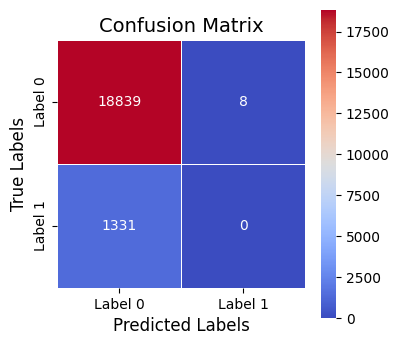

In [12]:


# Klassifikationsbericht erstellen
report = classification_report(np.argmax(y_test_data_onehot_w2v, axis=1), predicted_classes_w2v, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(np.argmax(y_test_data_onehot_w2v, axis=1), predicted_classes_w2v)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


#### Modeltraining mit anderen Parametern

(Aktivierungsfunktion in der Dense-Schicht zu sigmoid ändern, da diese für Binärklassifikation besser geeignet sein soll)

In [13]:
print("Einzigartige Werte in y_train_2:", np.unique(y_train_2))

count_ones = y_train_2.value_counts().get(1, 0)  # Falls 1 nicht existiert, wird 0 zurückgegeben
print(f"Anzahl der 1en in y_train_2: {count_ones}")

Einzigartige Werte in y_train_2: [0 1]
Anzahl der 1en in y_train_2: 1331


In [14]:
print("Einzigartige Werte in y_train_2:", np.unique(y_test_data))

count_ones = y_test_data.value_counts().get(1, 0)  # Falls 1 nicht existiert, wird 0 zurückgegeben
print(f"Anzahl der 1en in y_train_2: {count_ones}")

Einzigartige Werte in y_train_2: [0 1]
Anzahl der 1en in y_train_2: 595


In [15]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_2 = Sequential()

# LSTM-Schicht
model_2.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_2.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_2.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

#class_weight = {0: 1, 1: 3} 
history_2 = model_2.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    #class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten
predictions_2 = model_2.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_2 = (predictions_2 > threshold).astype(int)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 31s - 50ms/step - accuracy: 0.9403 - loss: 0.1828 - recall: 0.2479 - val_accuracy: 0.9396 - val_loss: 0.1818 - val_recall: 0.1378
Epoch 2/10
631/631 - 28s - 44ms/step - accuracy: 0.9510 - loss: 0.1437 - recall: 0.4132 - val_accuracy: 0.9492 - val_loss: 0.1504 - val_recall: 0.3193
Epoch 3/10
631/631 - 26s - 41ms/step - accuracy: 0.9540 - loss: 0.1344 - recall: 0.4921 - val_accuracy: 0.9505 - val_loss: 0.1456 - val_recall: 0.5412
Epoch 4/10
631/631 - 28s - 45ms/step - accuracy: 0.9594 - loss: 0.1187 - recall: 0.5470 - val_accuracy: 0.9485 - val_loss: 0.1438 - val_recall: 0.2723
Epoch 5/10
631/631 - 27s - 43ms/step - accuracy: 0.9635 - loss: 0.1078 - recall: 0.6311 - val_accuracy: 0.9539 - val_loss: 0.1323 - val_recall: 0.3782
Epoch 6/10
631/631 - 26s - 42ms/step - accuracy: 0.9678 - loss: 0.0936 - recall: 0.6837 - val_accuracy: 0.9528 - val_loss: 0.1362 - val_recall: 0.6235
Epoch 7/10
631/631 - 27s - 43ms/step - accuracy: 0.9715 - loss: 0.0872 - recall: 0.7325 - val_

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      8239
     Class 1       0.67      0.57      0.61       595

    accuracy                           0.95      8834
   macro avg       0.82      0.77      0.79      8834
weighted avg       0.95      0.95      0.95      8834

[[8070  169]
 [ 258  337]]


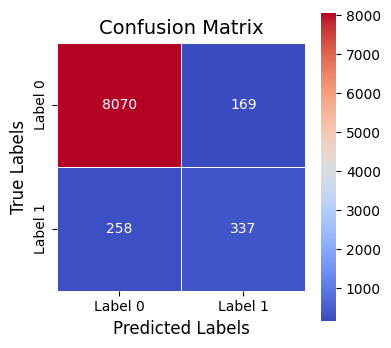

In [19]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_2, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_2)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Aktivierungsfunktion in der Dense-Schicht zu sigmoid ändern,class_wight hinzufügen)

In [20]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_3 = Sequential()

# LSTM-Schicht
model_3.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_3.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_3.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_3 = model_3.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten
predictions_3 = model_3.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_3 = (predictions_3 > threshold).astype(int)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 30s - 47ms/step - accuracy: 0.9108 - loss: 0.3919 - recall_1: 0.4538 - val_accuracy: 0.9442 - val_loss: 0.2012 - val_recall_1: 0.3361
Epoch 2/10
631/631 - 26s - 41ms/step - accuracy: 0.9290 - loss: 0.3146 - recall_1: 0.5920 - val_accuracy: 0.9223 - val_loss: 0.2091 - val_recall_1: 0.6555
Epoch 3/10
631/631 - 26s - 41ms/step - accuracy: 0.9358 - loss: 0.2846 - recall_1: 0.7055 - val_accuracy: 0.9458 - val_loss: 0.1950 - val_recall_1: 0.5664
Epoch 4/10
631/631 - 26s - 41ms/step - accuracy: 0.9465 - loss: 0.2507 - recall_1: 0.6897 - val_accuracy: 0.9523 - val_loss: 0.1400 - val_recall_1: 0.3731
Epoch 5/10
631/631 - 27s - 43ms/step - accuracy: 0.9514 - loss: 0.2327 - recall_1: 0.7273 - val_accuracy: 0.9512 - val_loss: 0.1695 - val_recall_1: 0.5630
Epoch 6/10
631/631 - 28s - 44ms/step - accuracy: 0.9583 - loss: 0.2057 - recall_1: 0.7701 - val_accuracy: 0.9478 - val_loss: 0.1489 - val_recall_1: 0.6588
Epoch 7/10
631/631 - 28s - 45ms/step - accuracy: 0.9615 - loss: 0.1907

In [21]:

count_zeros = np.sum(y_test_data == 0)
count_ones = np.sum(y_test_data == 1)
print(f"Anzahl der 0en: {count_zeros}, Anzahl der 1en: {count_ones}")

print("Einzigartige Werte in predicted_classes_2:", np.unique(predicted_classes_2))
count_zeros = np.sum(predicted_classes_2 == 0)
count_ones = np.sum(predicted_classes_2 == 1)
print(f"Anzahl der 0en: {count_zeros}, Anzahl der 1en: {count_ones}")


Anzahl der 0en: 8239, Anzahl der 1en: 595
Einzigartige Werte in predicted_classes_2: [0 1]
Anzahl der 0en: 8328, Anzahl der 1en: 506


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.98      0.97      0.97      8239
     Class 1       0.59      0.67      0.63       595

    accuracy                           0.95      8834
   macro avg       0.78      0.82      0.80      8834
weighted avg       0.95      0.95      0.95      8834

[[7964  275]
 [ 199  396]]


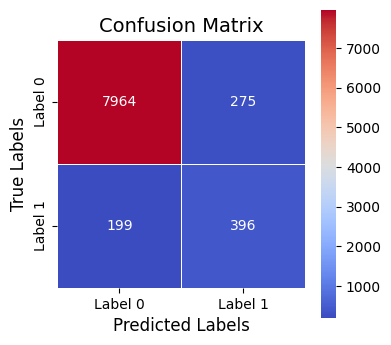

In [25]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_3, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_3)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Recall speziel für Klasse 1 festlegen: muss man in sigmoid nicht, da er dies automatisch macht

#### Modeltraining mit anderen Parametern

(units erhöht mit sigmoid)

In [26]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_6 = Sequential()

# LSTM-Schicht
model_6.add(LSTM(units=192, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_6.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_6.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_6 = model_6.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
   class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

# Vorhersagen auf Testdaten
predictions_6 = model_6.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_6 = (predictions_6 > threshold).astype(int)
#predicted_classes_3 = np.argmax(predictions_2, axis=1)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 34s - 55ms/step - accuracy: 0.9143 - loss: 0.3883 - recall_4: 0.4936 - val_accuracy: 0.9360 - val_loss: 0.2307 - val_recall_4: 0.3462
Epoch 2/10
631/631 - 31s - 48ms/step - accuracy: 0.9284 - loss: 0.4474 - recall_4: 0.3456 - val_accuracy: 0.9390 - val_loss: 0.2131 - val_recall_4: 0.1832
Epoch 3/10
631/631 - 32s - 51ms/step - accuracy: 0.9274 - loss: 0.3902 - recall_4: 0.4425 - val_accuracy: 0.8796 - val_loss: 0.3016 - val_recall_4: 0.6454
Epoch 4/10
631/631 - 36s - 58ms/step - accuracy: 0.9293 - loss: 0.3248 - recall_4: 0.5808 - val_accuracy: 0.9445 - val_loss: 0.1598 - val_recall_4: 0.5613
Epoch 5/10
631/631 - 33s - 52ms/step - accuracy: 0.9404 - loss: 0.2723 - recall_4: 0.6476 - val_accuracy: 0.9471 - val_loss: 0.1507 - val_recall_4: 0.5866
Epoch 6/10
631/631 - 31s - 50ms/step - accuracy: 0.9458 - loss: 0.2458 - recall_4: 0.6912 - val_accuracy: 0.9478 - val_loss: 0.1489 - val_recall_4: 0.4908
Epoch 7/10
631/631 - 31s - 50ms/step - accuracy: 0.9521 - loss: 0.2161

In [27]:

count_zeros = np.sum(y_test_data == 0)
count_ones = np.sum(y_test_data == 1)
print(f"Anzahl der 0en: {count_zeros}, Anzahl der 1en: {count_ones}")

print("Einzigartige Werte in predicted_classes_2:", np.unique(predicted_classes_6))
count_zeros = np.sum(predicted_classes_6 == 0)
count_ones = np.sum(predicted_classes_6 == 1)
print(f"Anzahl der 0en: {count_zeros}, Anzahl der 1en: {count_ones}")


Anzahl der 0en: 8239, Anzahl der 1en: 595
Einzigartige Werte in predicted_classes_2: [0 1]
Anzahl der 0en: 8301, Anzahl der 1en: 533


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.97      8239
     Class 1       0.67      0.60      0.63       595

    accuracy                           0.95      8834
   macro avg       0.82      0.79      0.80      8834
weighted avg       0.95      0.95      0.95      8834

[[8061  178]
 [ 240  355]]


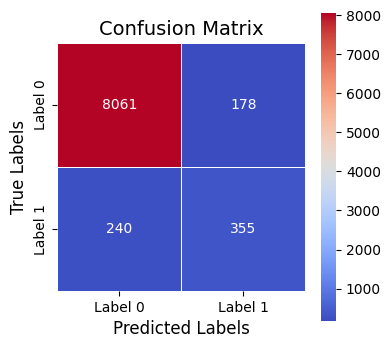

In [28]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_6, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_6)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Dropout reduzieren mit sigmoid)

In [29]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_4 = Sequential()

# LSTM-Schicht
model_4.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_4.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_4.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_4 = model_4.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_4 = model_4.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_4= (predictions_4 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
631/631 - 29s - 45ms/step - accuracy: 0.9115 - loss: 0.4793 - recall_5: 0.2772 - val_accuracy: 0.9236 - val_loss: 0.2436 - val_recall_5: 0.4034
Epoch 2/10
631/631 - 25s - 40ms/step - accuracy: 0.9073 - loss: 0.4171 - recall_5: 0.4726 - val_accuracy: 0.9355 - val_loss: 0.2361 - val_recall_5: 0.0739
Epoch 3/10
631/631 - 26s - 41ms/step - accuracy: 0.9304 - loss: 0.4880 - recall_5: 0.1893 - val_accuracy: 0.9349 - val_loss: 0.2805 - val_recall_5: 0.0975
Epoch 4/10
631/631 - 25s - 40ms/step - accuracy: 0.9354 - loss: 0.4979 - recall_5: 0.1330 - val_accuracy: 0.9349 - val_loss: 0.2598 - val_recall_5: 0.0975
Epoch 5/10
631/631 - 25s - 40ms/step - accuracy: 0.9355 - loss: 0.4958 - recall_5: 0.1360 - val_accuracy: 0.9340 - val_loss: 0.2682 - val_recall_5: 0.1076
Epoch 6/10
631/631 - 25s - 40ms/step - accuracy: 0.9357 - loss: 0.4895 - recall_5: 0.1638 - val_accuracy: 0.9339 - val_loss: 0.2723 - val_recall_5: 0.1059
Epoch 7/10
631/631 - 26s - 41ms/step - accuracy: 0.9358 - loss: 0.4883

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8239
     Class 1       0.59      0.63      0.61       595

    accuracy                           0.95      8834
   macro avg       0.78      0.80      0.79      8834
weighted avg       0.95      0.95      0.95      8834

[[7978  261]
 [ 219  376]]


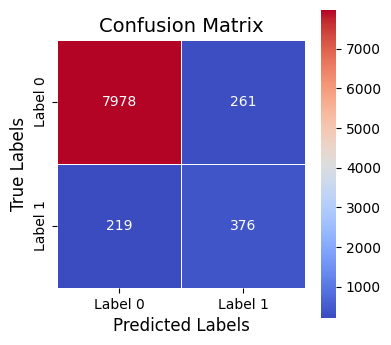

In [30]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_4, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_4)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

(Epochenerhöhung mit sigmoid)

In [31]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_7 = Sequential()

# LSTM-Schicht
model_7.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_7 .add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_7 .add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_7 .compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_7 = model_7 .fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_7 =model_7.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_7 = (predictions_7 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
631/631 - 29s - 47ms/step - accuracy: 0.9243 - loss: 0.3451 - recall_6: 0.5349 - val_accuracy: 0.9449 - val_loss: 0.1577 - val_recall_6: 0.5395
Epoch 2/20
631/631 - 26s - 41ms/step - accuracy: 0.9408 - loss: 0.2914 - recall_6: 0.6304 - val_accuracy: 0.9509 - val_loss: 0.1542 - val_recall_6: 0.4790
Epoch 3/20
631/631 - 26s - 41ms/step - accuracy: 0.9429 - loss: 0.2729 - recall_6: 0.6604 - val_accuracy: 0.9435 - val_loss: 0.1642 - val_recall_6: 0.6034
Epoch 4/20
631/631 - 26s - 41ms/step - accuracy: 0.9500 - loss: 0.2520 - recall_6: 0.6957 - val_accuracy: 0.9448 - val_loss: 0.1701 - val_recall_6: 0.6101
Epoch 5/20
631/631 - 26s - 41ms/step - accuracy: 0.9530 - loss: 0.2284 - recall_6: 0.7115 - val_accuracy: 0.8751 - val_loss: 0.2124 - val_recall_6: 0.8286
Epoch 6/20
631/631 - 26s - 41ms/step - accuracy: 0.9559 - loss: 0.2139 - recall_6: 0.7724 - val_accuracy: 0.9356 - val_loss: 0.1650 - val_recall_6: 0.6941
Epoch 7/20
631/631 - 26s - 41ms/step - accuracy: 0.9566 - loss: 0.1893

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      8239
     Class 1       0.70      0.60      0.65       595

    accuracy                           0.96      8834
   macro avg       0.84      0.79      0.81      8834
weighted avg       0.95      0.96      0.95      8834

[[8086  153]
 [ 237  358]]


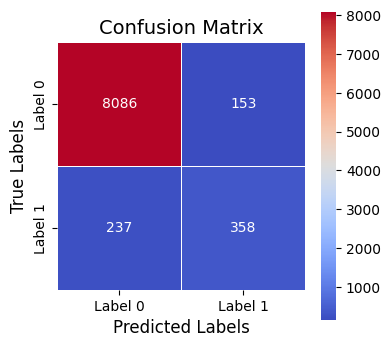

In [34]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_7, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_7)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

Kombi

In [35]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_8 = Sequential()

# LSTM-Schicht
model_8.add(LSTM(units=256, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_8.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_8.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_8 = model_8.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_8 = model_8.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_8= (predictions_8 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
631/631 - 80s - 126ms/step - accuracy: 0.9305 - loss: 0.4929 - recall_8: 0.2006 - val_accuracy: 0.9295 - val_loss: 0.2579 - val_recall_8: 0.2672
Epoch 2/20
631/631 - 88s - 139ms/step - accuracy: 0.9320 - loss: 0.5215 - recall_8: 0.0526 - val_accuracy: 0.9326 - val_loss: 0.2832 - val_recall_8: 0.0151
Epoch 3/20
631/631 - 75s - 119ms/step - accuracy: 0.9340 - loss: 0.5174 - recall_8: 0.0466 - val_accuracy: 0.9325 - val_loss: 0.2787 - val_recall_8: 0.0319
Epoch 4/20
631/631 - 102s - 162ms/step - accuracy: 0.9160 - loss: 0.4187 - recall_8: 0.2374 - val_accuracy: 0.9326 - val_loss: 0.2135 - val_recall_8: 0.0000e+00
Epoch 5/20
631/631 - 94s - 150ms/step - accuracy: 0.9076 - loss: 0.3509 - recall_8: 0.3974 - val_accuracy: 0.9223 - val_loss: 0.2085 - val_recall_8: 0.2319
Epoch 6/20
631/631 - 102s - 161ms/step - accuracy: 0.9078 - loss: 0.3324 - recall_8: 0.3907 - val_accuracy: 0.9350 - val_loss: 0.1849 - val_recall_8: 0.2353
Epoch 7/20
631/631 - 95s - 151ms/step - accuracy: 0.9178 -

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8239
     Class 1       0.58      0.65      0.62       595

    accuracy                           0.95      8834
   macro avg       0.78      0.81      0.79      8834
weighted avg       0.95      0.95      0.95      8834

[[7963  276]
 [ 207  388]]


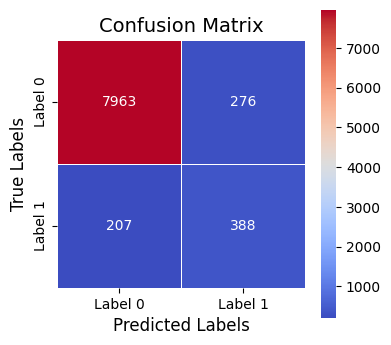

In [36]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_8, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_8)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Modeltraining mit anderen Parametern

Batchsize Erhöhung

In [37]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_9 = Sequential()

# LSTM-Schicht
model_9.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_9.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_9.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_9.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_9 = model_8.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=10,
    batch_size=64,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_9 = model_9.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_9= (predictions_9 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
316/316 - 60s - 189ms/step - accuracy: 0.9958 - loss: 0.0342 - recall_8: 0.9737 - val_accuracy: 0.9475 - val_loss: 0.2391 - val_recall_8: 0.6168
Epoch 2/10
316/316 - 72s - 228ms/step - accuracy: 0.9980 - loss: 0.0258 - recall_8: 0.9797 - val_accuracy: 0.9483 - val_loss: 0.2505 - val_recall_8: 0.6168
Epoch 3/10
316/316 - 51s - 161ms/step - accuracy: 0.9968 - loss: 0.0291 - recall_8: 0.9745 - val_accuracy: 0.9501 - val_loss: 0.2368 - val_recall_8: 0.5496
Epoch 4/10
316/316 - 47s - 148ms/step - accuracy: 0.9975 - loss: 0.0251 - recall_8: 0.9797 - val_accuracy: 0.9504 - val_loss: 0.2524 - val_recall_8: 0.5832
Epoch 5/10
316/316 - 59s - 188ms/step - accuracy: 0.9973 - loss: 0.0254 - recall_8: 0.9790 - val_accuracy: 0.9466 - val_loss: 0.2633 - val_recall_8: 0.6134
Epoch 6/10
316/316 - 57s - 179ms/step - accuracy: 0.9973 - loss: 0.0250 - recall_8: 0.9805 - val_accuracy: 0.9510 - val_loss: 0.2143 - val_recall_8: 0.5395
Epoch 7/10
316/316 - 46s - 146ms/step - accuracy: 0.9975 - loss:

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.69      0.79      8239
     Class 1       0.05      0.24      0.09       595

    accuracy                           0.66      8834
   macro avg       0.49      0.46      0.44      8834
weighted avg       0.87      0.66      0.74      8834

[[5680 2559]
 [ 452  143]]


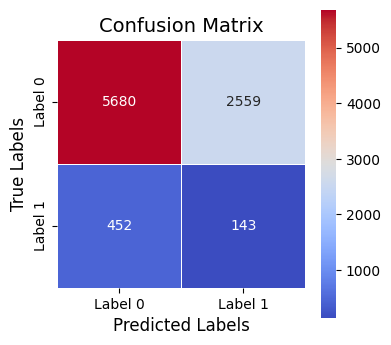

In [38]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_9, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_9)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Epcohenerhöhung, dropout Reduzierung 

In [7]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_10 = Sequential()

# LSTM-Schicht
model_10.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_10.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_10.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_10.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_10 = model_10.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_10 = model_10.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_10= (predictions_10 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
634/634 - 29s - 46ms/step - accuracy: 0.9335 - loss: 0.5335 - recall: 0.0179 - val_accuracy: 0.9314 - val_loss: 0.2894 - val_recall: 0.0112
Epoch 2/20
634/634 - 24s - 39ms/step - accuracy: 0.9348 - loss: 0.5260 - recall: 0.0142 - val_accuracy: 0.9314 - val_loss: 0.3017 - val_recall: 0.0112
Epoch 3/20
634/634 - 25s - 40ms/step - accuracy: 0.9348 - loss: 0.5247 - recall: 0.0134 - val_accuracy: 0.9314 - val_loss: 0.3077 - val_recall: 0.0112
Epoch 4/20
634/634 - 26s - 42ms/step - accuracy: 0.9344 - loss: 0.5265 - recall: 0.0082 - val_accuracy: 0.9310 - val_loss: 0.2995 - val_recall: 0.0016
Epoch 5/20
634/634 - 26s - 41ms/step - accuracy: 0.9341 - loss: 0.5266 - recall: 0.0037 - val_accuracy: 0.9313 - val_loss: 0.2846 - val_recall: 0.0048
Epoch 6/20
634/634 - 27s - 42ms/step - accuracy: 0.9342 - loss: 0.5251 - recall: 0.0052 - val_accuracy: 0.9312 - val_loss: 0.3335 - val_recall: 0.0048
Epoch 7/20
634/634 - 27s - 42ms/step - accuracy: 0.9204 - loss: 0.3724 - recall: 0.4055 - val_

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      8468
     Class 1       0.59      0.65      0.62       625

    accuracy                           0.94      9093
   macro avg       0.78      0.81      0.79      9093
weighted avg       0.95      0.94      0.95      9093

[[8182  286]
 [ 218  407]]


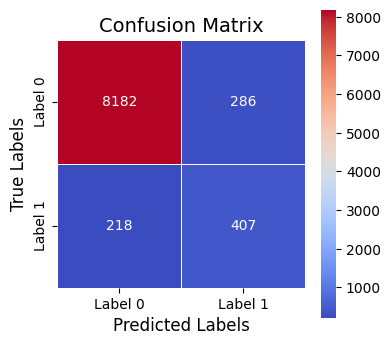

In [8]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_10, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_10)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Epochenreduzierung

In [41]:
samples, max_seq_len, vector_size = X_train_vectors_2.shape
num_classes = len(np.unique(y_train_2))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_11 = Sequential()

# LSTM-Schicht
model_11.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_11.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_11.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_11.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_11 = model_11.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=5,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten

predictions_11 = model_11.predict(X_test_data_vectors)

threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_11= (predictions_11 > threshold).astype(int)



C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


KeyboardInterrupt: 

In [ ]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_11, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data, predicted_classes_11)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Bidirektional

In [50]:

# Modellinitialisierung
model_bidir = Sequential()

# Erste LSTM-Schicht mit Bidirectional für bessere Kontextverarbeitung
model_bidir.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))

# Zweite LSTM-Schicht für tiefere Merkmalsextraktion
model_bidir.add(Bidirectional(LSTM(units=64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2)))

# Dense-Schicht für die Ausgabe mit Sigmoid für binäre Klassifikation
model_bidir.add(Dense(units=1, activation='sigmoid'))

# Modell kompilieren mit verbessertem Optimierer und zusätzlichen Metriken
model_bidir.compile(optimizer=Adam(learning_rate=0.0005), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy', Recall()])

# Early Stopping Callback zur Vermeidung von Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Modelltraining mit optimierten Parametern
history_bidir= model_bidir.fit(
    X_train_vectors_2, y_train_2,
    validation_data=(X_test_data_vectors, y_test_data),
    epochs=20,  # Erhöhte Epochenzahl mit EarlyStopping
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Vorhersagen auf Testdaten
predictions_bidir = model_bidir.predict(X_test_data_vectors)
predicted_classes_bidir = (predictions_bidir > 0.5).astype(int)


Epoch 1/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.9281 - loss: 0.2199 - recall_14: 0.1439 - val_accuracy: 0.9459 - val_loss: 0.1585 - val_recall_14: 0.3126
Epoch 2/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9493 - loss: 0.1441 - recall_14: 0.3997 - val_accuracy: 0.9497 - val_loss: 0.1435 - val_recall_14: 0.3580
Epoch 3/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.9537 - loss: 0.1295 - recall_14: 0.4949 - val_accuracy: 0.9525 - val_loss: 0.1427 - val_recall_14: 0.4050
Epoch 4/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9565 - loss: 0.1219 - recall_14: 0.4742 - val_accuracy: 0.9531 - val_loss: 0.1331 - val_recall_14: 0.5059
Epoch 5/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9611 - loss: 0.1142 - recall_14: 0.5358 - val_accuracy: 0.9545 - val_loss: 0.1382 - val_recall_14: 0.4319
Epoch 6/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9627 - loss: 0.1049 - recall_14: 0.5925 - val_accuracy: 0.9555

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      8239
     Class 1       0.71      0.51      0.59       595

    accuracy                           0.95      8834
   macro avg       0.84      0.75      0.78      8834
weighted avg       0.95      0.95      0.95      8834

[[8119  120]
 [ 294  301]]


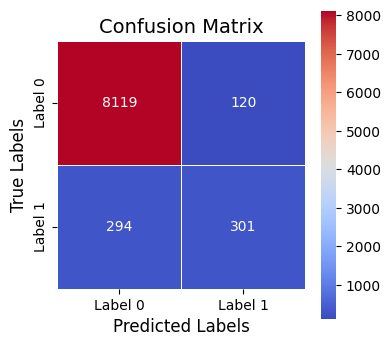

In [51]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_bidir, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data,predicted_classes_bidir)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Bidirektional

In [ ]:
# Modellinitialisierung
model_bidir_2 = Sequential()

# Bidirektionale LSTM-Schicht
model_bidir_2.add(Bidirectional(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False)))

# Optional: Dropout zur Vermeidung von Overfitting
model_bidir_2.add(Dropout(0.3))

# Dense-Schicht für die Ausgabe
model_bidir_2.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_bidir_2.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}

history_bidir_2 = model_bidir_2.fit(
    X_train_vectors_2, np.array(y_train_2),
    validation_data=(X_test_data_vectors, np.array(y_test_data)),
    epochs=20,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten
predictions_bidir_2 = model_bidir_2.predict(X_test_data_vectors)
threshold = 0.5  # Oder teste 0.4 oder 0.6
predicted_classes_bidir_2 = (predictions_bidir_2 > threshold).astype(int)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
634/634 - 34s - 54ms/step - accuracy: 0.9272 - loss: 0.3389 - recall_1: 0.4996 - val_accuracy: 0.9397 - val_loss: 0.1638 - val_recall_1: 0.5600
Epoch 2/20
634/634 - 30s - 47ms/step - accuracy: 0.9422 - loss: 0.2708 - recall_1: 0.6296 - val_accuracy: 0.9393 - val_loss: 0.1725 - val_recall_1: 0.6688
Epoch 3/20
634/634 - 31s - 49ms/step - accuracy: 0.9491 - loss: 0.2307 - recall_1: 0.6990 - val_accuracy: 0.8863 - val_loss: 0.2900 - val_recall_1: 0.8176
Epoch 4/20
634/634 - 32s - 50ms/step - accuracy: 0.9548 - loss: 0.1986 - recall_1: 0.7476 - val_accuracy: 0.9480 - val_loss: 0.1489 - val_recall_1: 0.6320
Epoch 5/20
634/634 - 32s - 50ms/step - accuracy: 0.9658 - loss: 0.1587 - recall_1: 0.8073 - val_accuracy: 0.9532 - val_loss: 0.1354 - val_recall_1: 0.5680
Epoch 6/20
634/634 - 34s - 53ms/step - accuracy: 0.9739 - loss: 0.1221 - recall_1: 0.8559 - val_accuracy: 0.9459 - val_loss: 0.1617 - val_recall_1: 0.6272
Epoch 7/20


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      8239
     Class 1       0.74      0.52      0.61       595

    accuracy                           0.96      8834
   macro avg       0.85      0.75      0.79      8834
weighted avg       0.95      0.96      0.95      8834

[[8130  109]
 [ 284  311]]


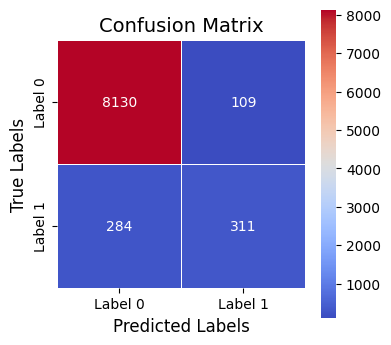

In [ ]:


# Klassifikationsbericht erstellen
report = classification_report(y_test_data, predicted_classes_bidir_2, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test_data,predicted_classes_bidir_2)
print(cm)
# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()